# Load the dataset

In [1]:
train_data_dir='data/cat_dog/sample/train'
validation_data_dir='data/cat_dog/sample/validation'
test_data_dir='data/cat_dog/sample/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_data_dir,
  target_size=(224, 224),
  class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
  validation_data_dir,
  target_size=(224, 224),
  class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
  test_data_dir,
  target_size=(224, 224),
  class_mode='binary'
)

Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Load the pre-trained model

In [5]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(
  input_shape=(224, 224, 3),
  include_top=False,
)

def freeze_full_model(model):
  for layer in model.layers:
    layer.trainable = False
  return model

def freeze_specific_layers(model, n_layers):
  for layer in model.layers:
    layer.trainable = True

  for layer in model.layers[:n_layers]:
    layer.trainable = False
  return model

def unfreeze_full_model(model):
  for layer in model.layers:
    layer.trainable = True
  return model

def unfreeze_specific_layers(model, n_layers):
  for layer in model.layers:
    layer.trainable = False

  for layer in model.layers[:n_layers]:
    layer.trainable = True
  return model

base_model = freeze_full_model(base_model)
# base_model = unfreeze_full_model(base_model)
# base_model = freeze_specific_layers(base_model, 10)
# base_model = unfreeze_specific_layers(base_model, 10)

base_model.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

# Add custom layers to the pre-trained model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,651,649 (36.82 MB)

 Trainable params: 6,422,785 (24.50 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

# Compile the model

In [10]:
from tensorflow.keras.optimizers import Adam

optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define the early stopping callback

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model

In [12]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[early_stopping]).history

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 1.0000 - loss: 9.5872e-09 - val_accuracy: 0.9700 - val_loss: 1.2839
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 1.0000 - loss: 1.2973e-12 - val_accuracy: 0.9700 - val_loss: 1.2924
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 1.0000 - loss: 1.4095e-12 - val_accuracy: 0.9700 - val_loss: 1.2929
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 1.0000 - loss: 7.5015e-13 - val_accuracy: 0.9700 - val_loss: 1.2929
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 1.0000 - loss: 8.4106e-13 - val_accuracy: 0.9700 - val_loss: 1.2930
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 1.0000 - loss: 1.4113e-12 - val_accuracy: 0.9700 - val_loss: 1.2930
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 1.0000 - loss: 2.3909e-12 - val_accuracy: 0.9700 - val_loss: 1.2931
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 1.0000 - loss: 6

# Evaluate the model

In [16]:
loss, accuracy = model.evaluate(test_generator)

print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9647 - loss: 0.7522
Test accuracy: 0.9700
Test loss: 0.8622


# Plot training and validation performance over epochs

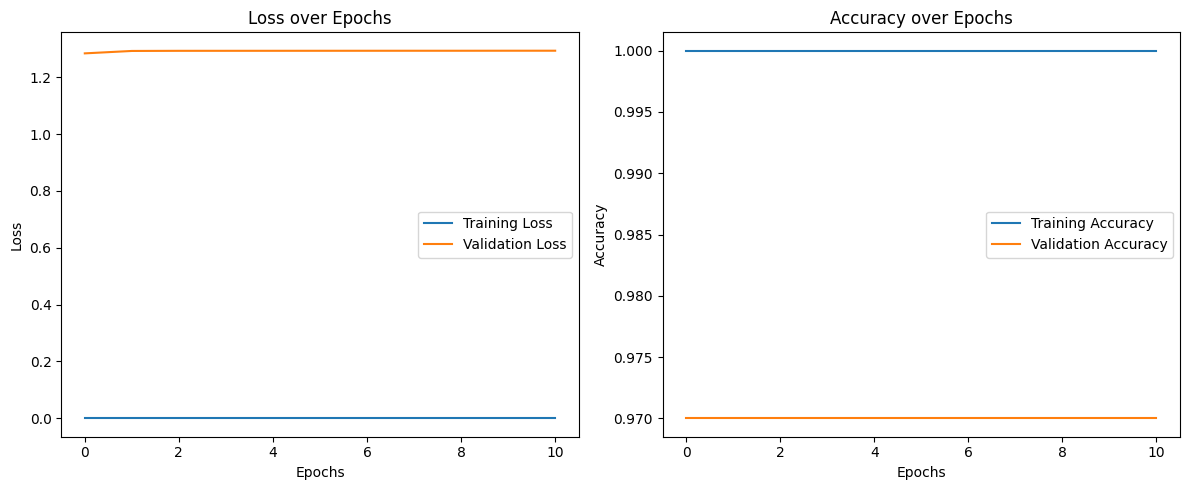

In [17]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history['loss'], label='Training Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.set_title('Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history['accuracy'], label='Training Accuracy')
ax2.plot(history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()